# Download viewer counts for the Doctor Who episodes

In [1]:
import re
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup

num = re.compile('\d+\.*\d*')

In [2]:
url = 'http://tardis.wikia.com/wiki/The_Doctor%27s_Daughter_(TV_story)'

In [3]:
bs = BeautifulSoup(requests.get(url).text, 'lxml')

In [4]:
bs.find('span', {'id':'Ratings'}).findNext('li').get_text().strip()

'Final BARB ratings - 7.33 million viewers'

In [5]:
url = 'http://tardis.wikia.com/wiki/List_of_Doctor_Who_television_stories'
bs = BeautifulSoup(requests.get(url).text, 'lxml')

In [6]:
elem = bs.find('span', {'id':'Ninth_Doctor'})

episodes = []
while elem:
    try:
        elem = elem.findNext('tr')
        tmp = elem.findAll('td')
        if tmp:
            if tmp[1].find('a'):
                episodes.append(tmp[1].find('a')['href'])
    except:
        pass

In [7]:
url = 'http://tardis.wikia.com'

ratings = []
for episode in tqdm(episodes):
    bs = BeautifulSoup(requests.get(url+episode).text, 'lxml')
    try:
        try:
            target = bs.find('span', {'id':'Ratings'}).findNext('li').get_text().strip()
        except:
            target = bs.find('span', {'id':'Rating'}).findNext('li').get_text().strip()
        found = re.search(num, target)
        if found:
            ratings.append(float(found[0])*1000000)
        else:
            ratings.append(0.0)
    except:
        ratings.append(0.0)
        print('Fehler: {}'.format(episode))

 65%|██████▌   | 149/229 [01:16<00:52,  1.52it/s]

Fehler: /wiki/Season_4


 67%|██████▋   | 153/229 [01:19<00:56,  1.34it/s]

Fehler: /wiki/Season_7


 69%|██████▉   | 159/229 [01:23<00:47,  1.47it/s]

Fehler: /wiki/Season_12


 75%|███████▌  | 172/229 [01:30<00:37,  1.53it/s]

Fehler: /wiki/Season_21


 77%|███████▋  | 176/229 [01:33<00:30,  1.72it/s]

Fehler: /wiki/Season_24


 79%|███████▊  | 180/229 [01:35<00:25,  1.89it/s]

Fehler: /wiki/1996_(releases)


 79%|███████▉  | 182/229 [01:36<00:26,  1.75it/s]

Fehler: /wiki/Series_1_(Doctor_Who)


 81%|████████  | 185/229 [01:38<00:24,  1.79it/s]

Fehler: /wiki/Series_2_(Doctor_Who)


 83%|████████▎ | 190/229 [01:40<00:18,  2.09it/s]

Fehler: /wiki/Christmas_special


 88%|████████▊ | 201/229 [01:47<00:19,  1.43it/s]

Fehler: /wiki/Series_5_(Doctor_Who)


 89%|████████▉ | 204/229 [01:48<00:12,  2.06it/s]

Fehler: /wiki/Christmas_special


 92%|█████████▏| 210/229 [01:51<00:08,  2.25it/s]

Fehler: /wiki/Christmas_special


 95%|█████████▌| 218/229 [01:55<00:07,  1.56it/s]

Fehler: /wiki/Series_8_(Doctor_Who)


 97%|█████████▋| 221/229 [01:57<00:04,  1.94it/s]

Fehler: /wiki/Christmas_special


100%|██████████| 229/229 [02:01<00:00,  1.76it/s]


In [8]:
import pandas as pd
df = pd.DataFrame(columns=['Episode', 'Rating'])
df['Episode'] = episodes
df['Rating'] = ratings

In [9]:
import matplotlib.pyplot as plt

In [10]:
df

,Episode,Rating
0,/wiki/Rose_(TV_story),10810000.0
1,/wiki/The_End_of_the_World_(TV_story),7970000.0
2,/wiki/The_Unquiet_Dead_(TV_story),8860000.0
3,/wiki/Aliens_of_London_(TV_story),7630000.0
4,/wiki/World_War_Three_(TV_story),7600000.0
5,/wiki/Dalek_(TV_story),8600000.0
6,/wiki/The_Long_Game_(TV_story),8010000.0
7,/wiki/Father%27s_Day_(TV_story),8060000.0
8,/wiki/The_Empty_Child_(TV_story),7100000.0
9,/wiki/The_Doctor_Dances_(TV_story),0.0


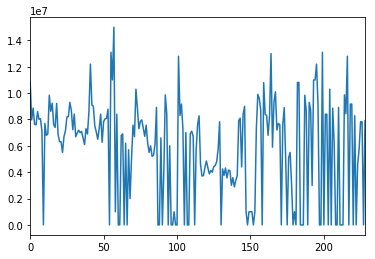

In [11]:
df['Rating'].plot()
plt.show()